In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [92]:
x_data = np.genfromtxt("Assignment_1_datasets/weightedX.csv")
# Normailzation
x_data = (x_data - np.mean(x_data) )/ np.std(x_data) 
x_data = np.vstack((x_data,np.ones_like(x_data)))
x_data = x_data.T
y_data = np.genfromtxt("Assignment_1_datasets/weightedY.csv")

In [93]:
x_data.shape

(100, 2)

In [94]:
theta  = np.asarray([0,0]) # theta_1,theta_0
diff = y_data - np.matmul(x_data,theta)
loss = 0.5 * np.matmul(diff.T,diff)

In [95]:
loss

121.390984336008

In [96]:
theta_final = np.matmul(np.linalg.inv(np.matmul(x_data.T,x_data)),np.matmul(x_data.T,y_data))

In [97]:
theta_final 

array([ 0.83519315,  1.03128116])

In [98]:
diff = y_data - np.matmul(x_data,theta_final)
loss = 0.5 * np.matmul(diff.T,diff)
print(loss)

33.3365627019


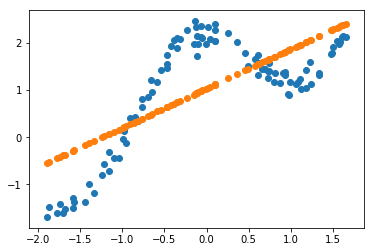

In [102]:
plt.scatter(x_data[:,0],y_data)
plt.scatter(x_data[:,0],theta_final[1] + theta_final[0]*x_data[:,0] )

In [88]:
def loc_weighted_lr(x_data,y_data, input_x, tau = 0.8):
    W = np.diag(np.exp(-np.square(x_data[:,0] - input_x)/(2*tau*tau)))
    theta_loc = np.matmul(np.linalg.inv(np.matmul(np.matmul(x_data.T,W),x_data)),
                          np.matmul(np.matmul(x_data.T,W),y_data))
    return theta_loc[1] + theta_loc[0]*input_x

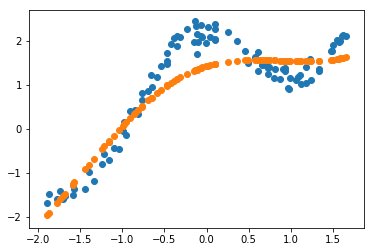

In [89]:
plt.scatter(x_data.T[0],y_data)
outp = []
for i in range(100):
    outp.append(loc_weighted_lr(x_data,y_data,x_data[i,0]))
plt.scatter(x_data[:,0],outp)

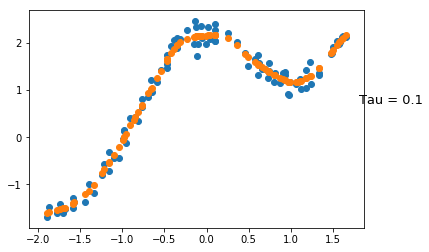

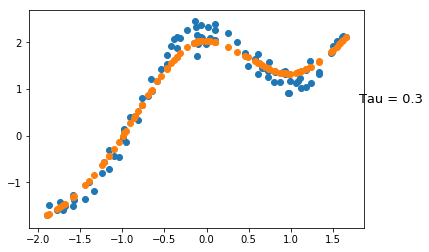

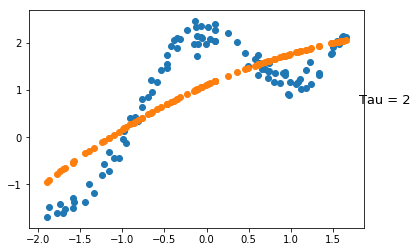

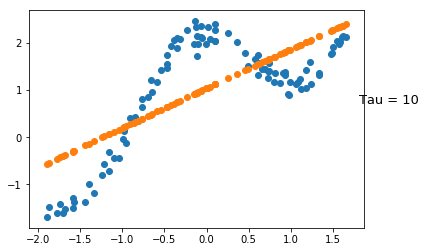

In [90]:
for t in [0.1,0.3,2,10]:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_data.T[0],y_data)
    outp = []
    for i in range(100):
        outp.append(loc_weighted_lr(x_data,y_data,x_data[i,0],tau=t))
    ax.scatter(x_data[:,0],outp)
    ax.text(1.8,0.7,"Tau = "+str(t),fontsize=13)


### When tau is too small the model starts fitting the small errors in the data, when tau is too large the "local" part matters less and it approaches normal regression, ie it starts ignoring the local trends.